### **Code to calculate and plot ant and larva positions for each assay chamber in the experiment.**

##### This script expects a directory containing the timedata_C*.csv files resulting from running 'Code_1_ETL_data_from_antrax.ipynb'.
##### Running this script will result in saved files 'PositionData_C*.csv' and 'PositionPlot_C*.pdf'.
##### Review of the PositionPlot's is necessary to correct errors in 'larva_detect_frame' in the file stats.csv (result file of Code_1_ETL...), before the next Code_3... is run.
##### Errors in 'larva_detect_frame' are corrected manually by review of the PositionPlot, timedata_C*.csv and/or PositionData_C*.csv, and films.

##### *You will see in the resulting PositionPlots, that the ants in chambers C8, C12, C13, C14, and C22 appear to have passed by the larva without engaging it.*
##### *This occurs most commonly when the ant is still groggy from anesthesia, or climbs on the chamber wall and passes the larva without touching it.*
##### *Following manual correction of 'larva_detect_frame', a new file 'stats_corrected.csv' is saved in the .../Sample_data_brood_care_assay/antrax/analysis directory.*


<Figure size 640x480 with 0 Axes>

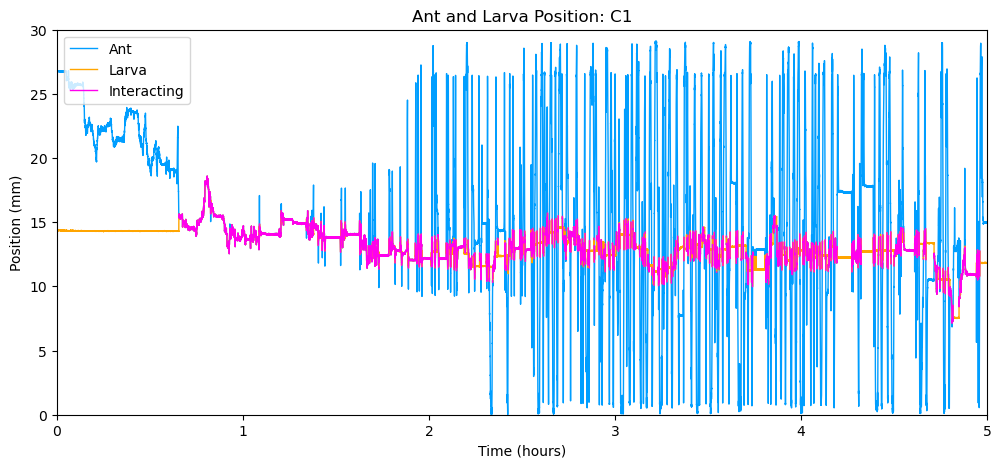

<Figure size 640x480 with 0 Axes>

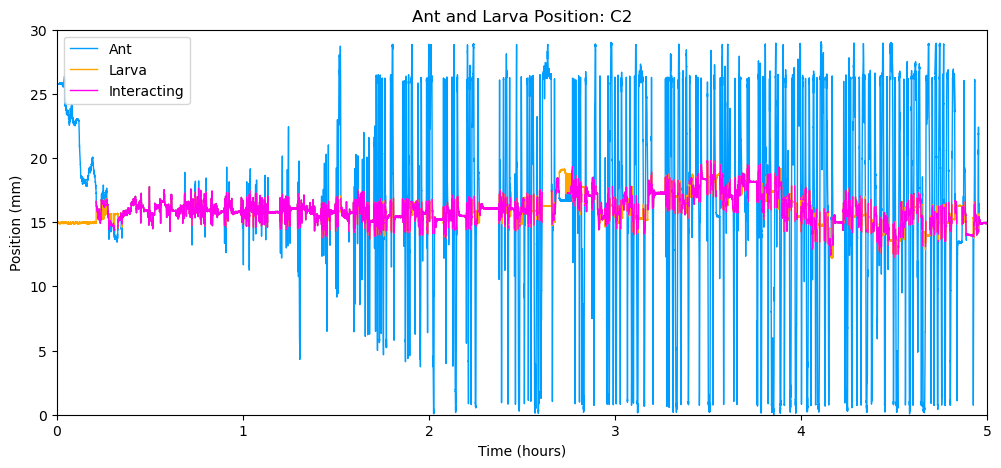

<Figure size 640x480 with 0 Axes>

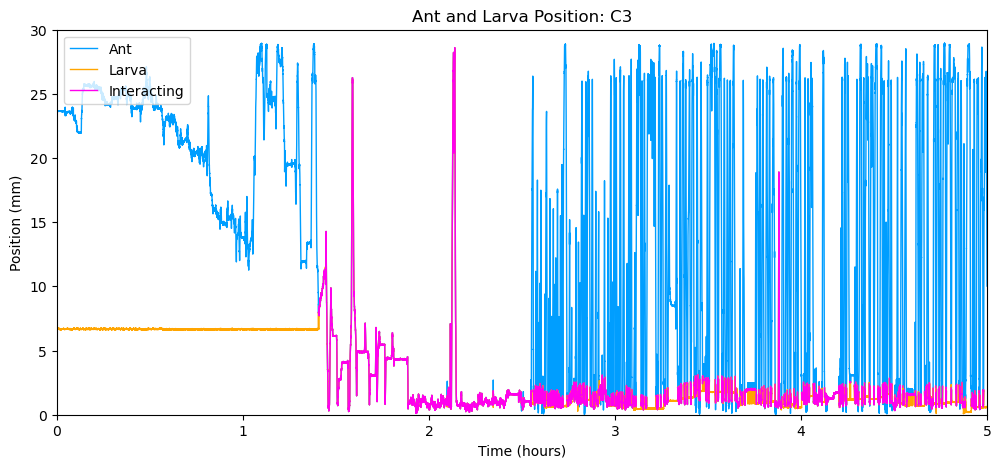

<Figure size 640x480 with 0 Axes>

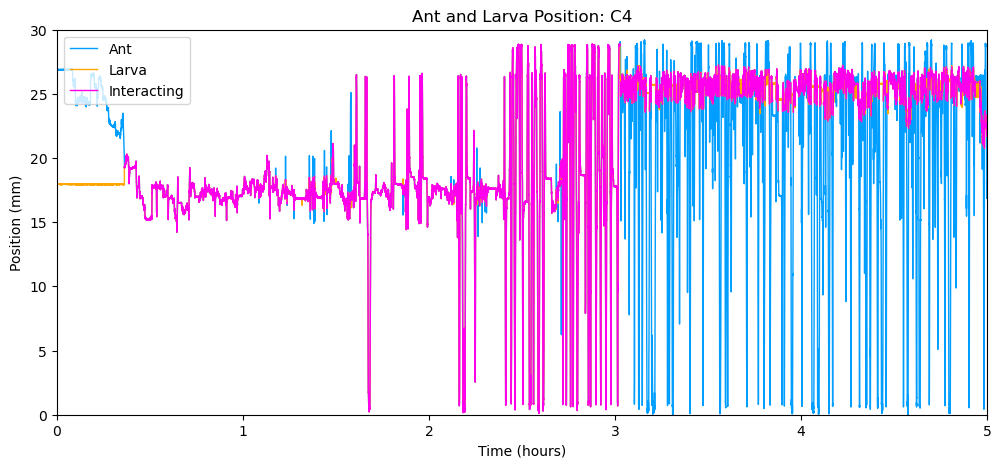

<Figure size 640x480 with 0 Axes>

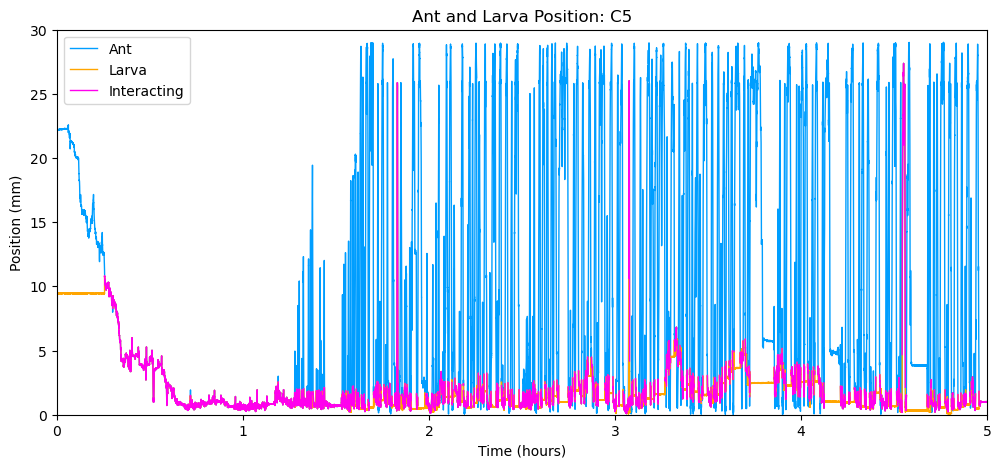

<Figure size 640x480 with 0 Axes>

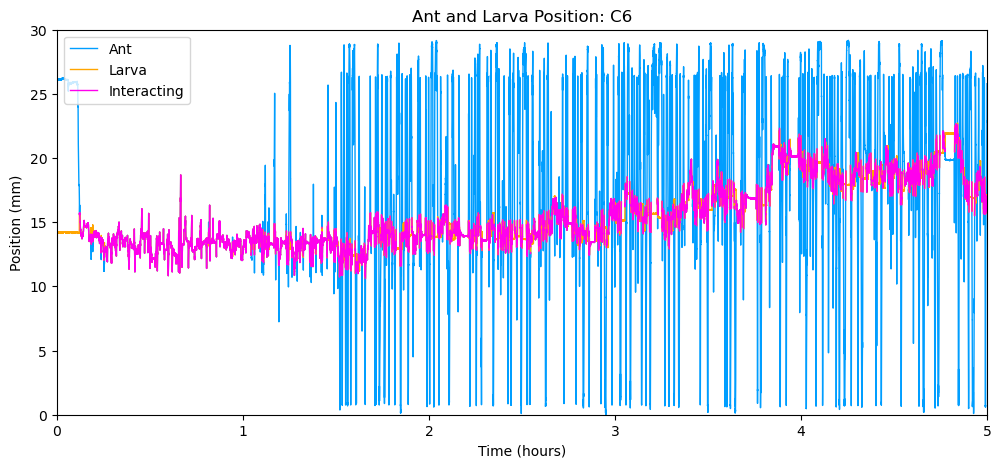

<Figure size 640x480 with 0 Axes>

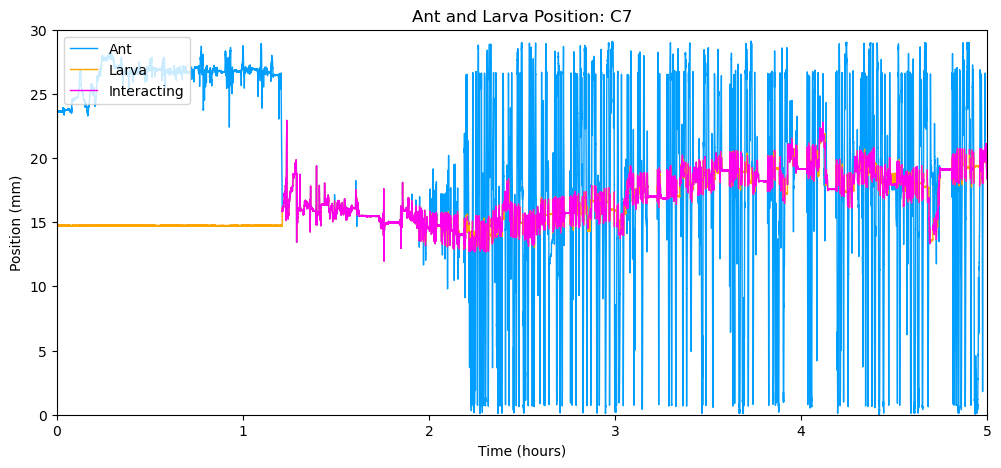

<Figure size 640x480 with 0 Axes>

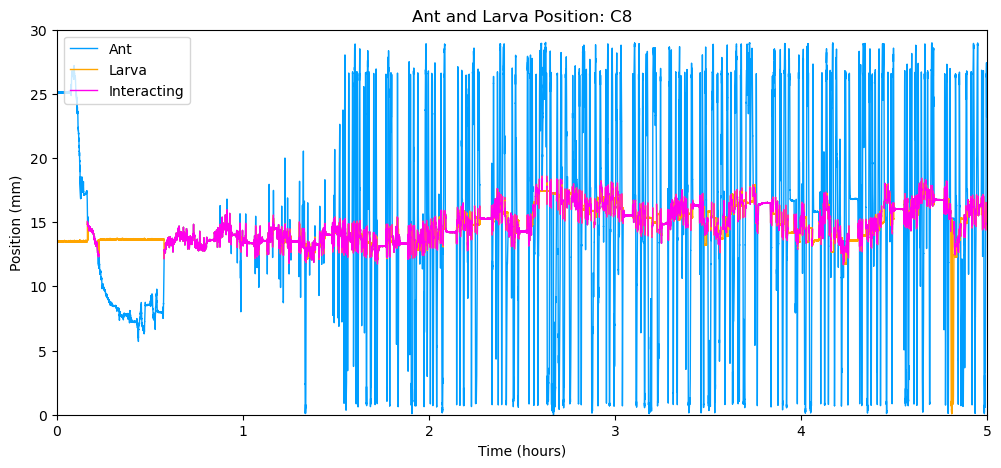

<Figure size 640x480 with 0 Axes>

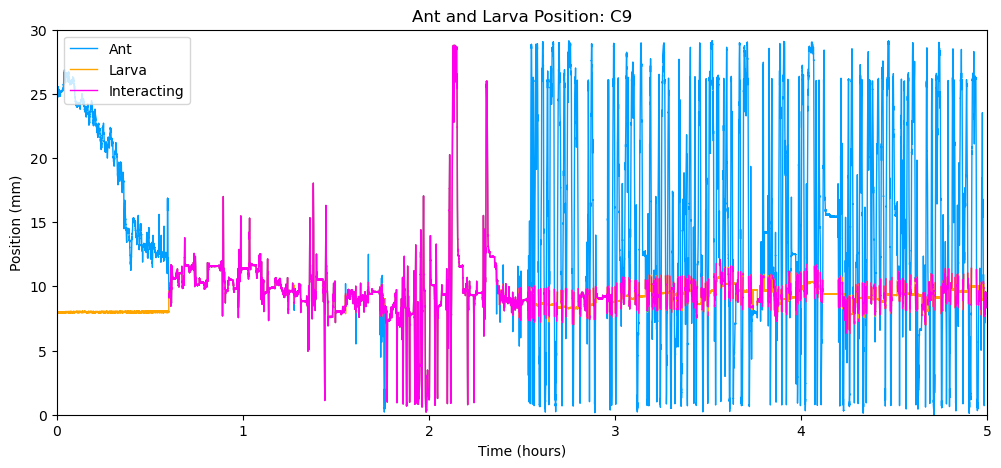

<Figure size 640x480 with 0 Axes>

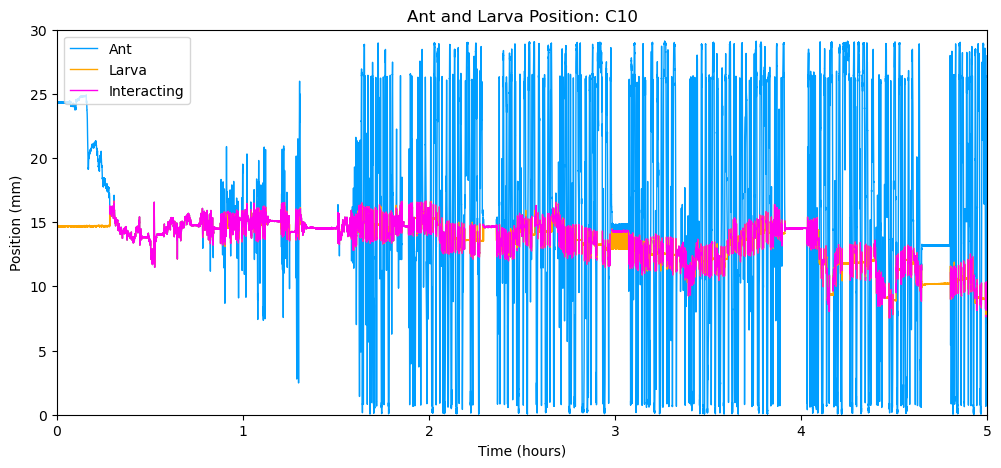

<Figure size 640x480 with 0 Axes>

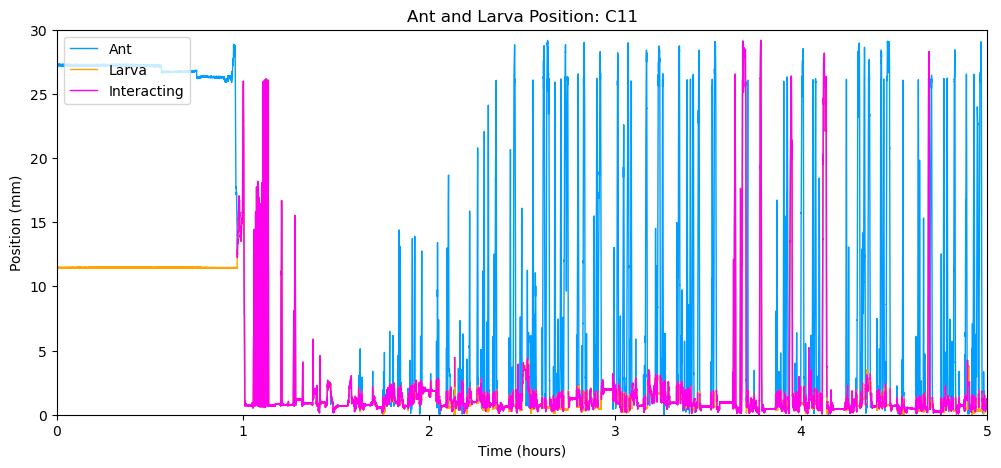

<Figure size 640x480 with 0 Axes>

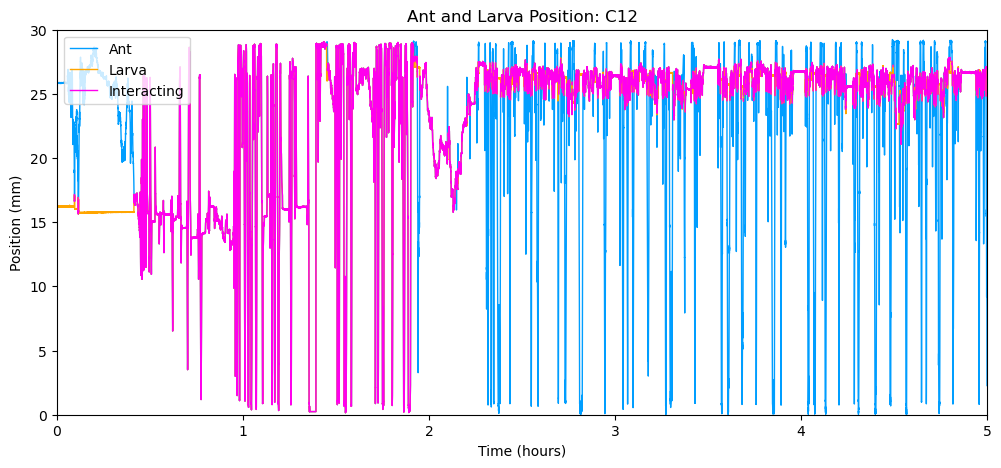

<Figure size 640x480 with 0 Axes>

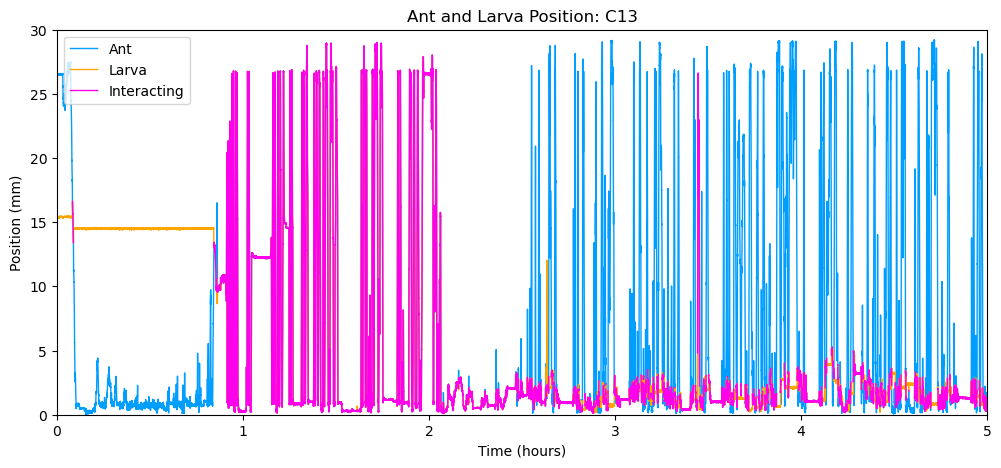

<Figure size 640x480 with 0 Axes>

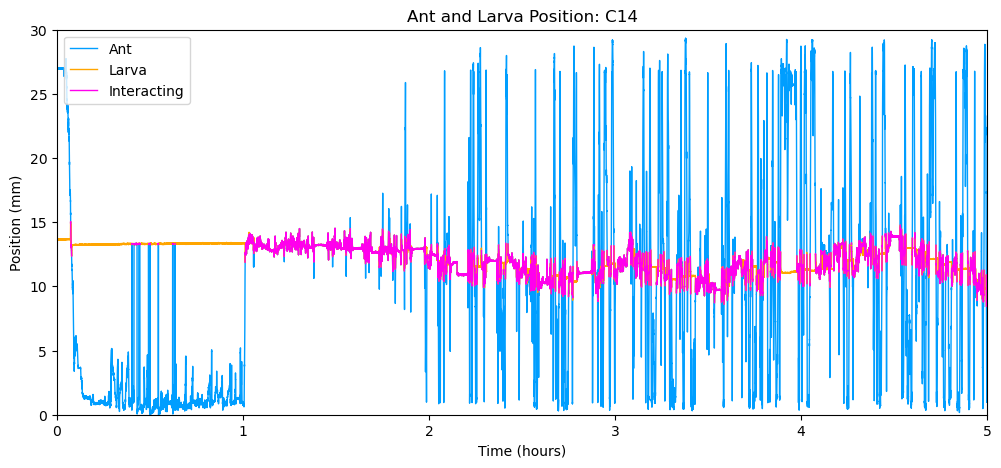

<Figure size 640x480 with 0 Axes>

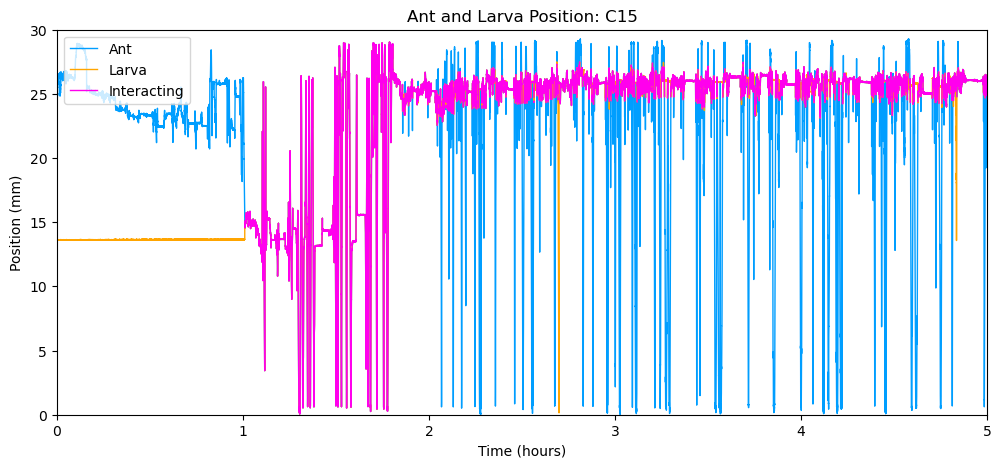

<Figure size 640x480 with 0 Axes>

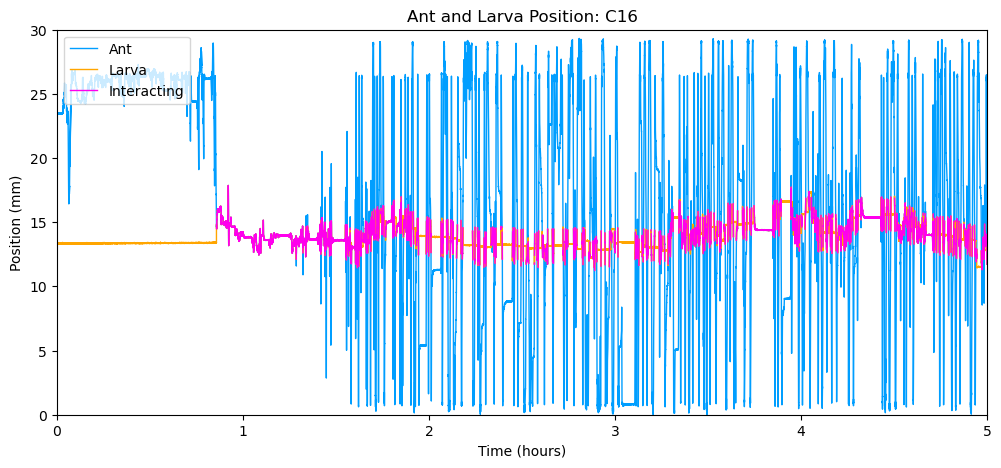

<Figure size 640x480 with 0 Axes>

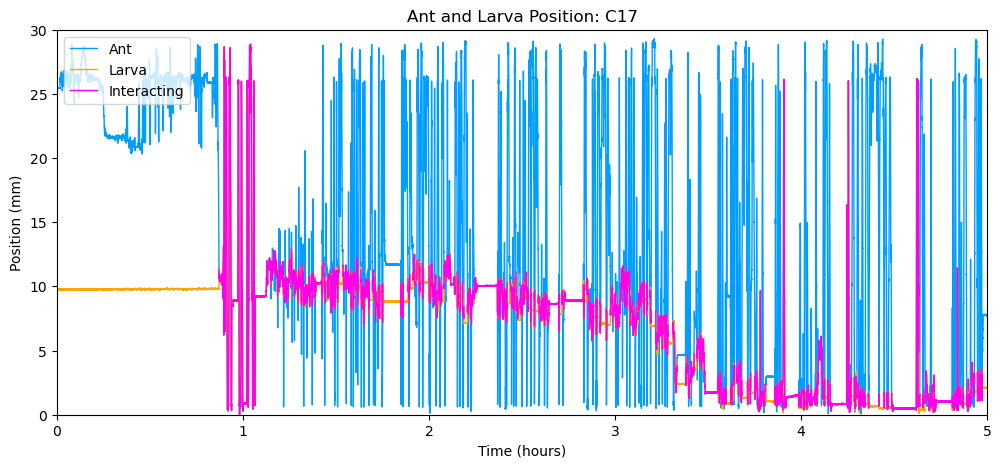

<Figure size 640x480 with 0 Axes>

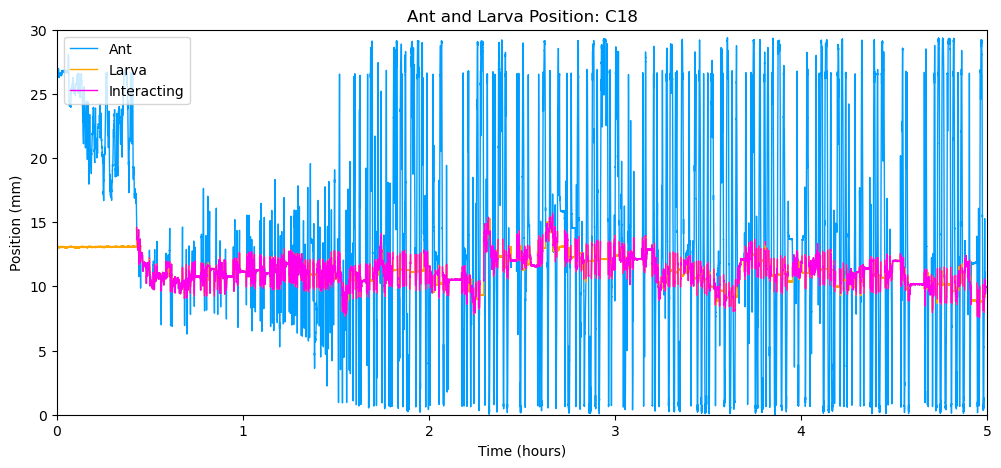

<Figure size 640x480 with 0 Axes>

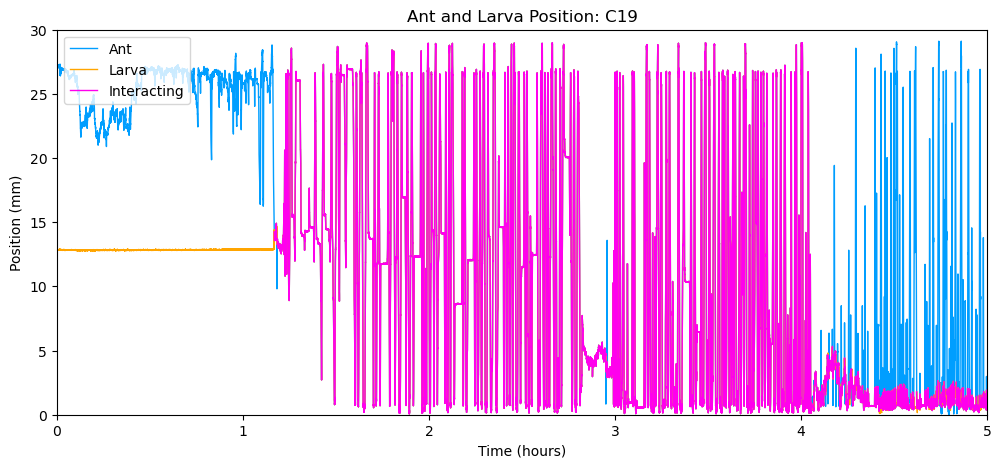

<Figure size 640x480 with 0 Axes>

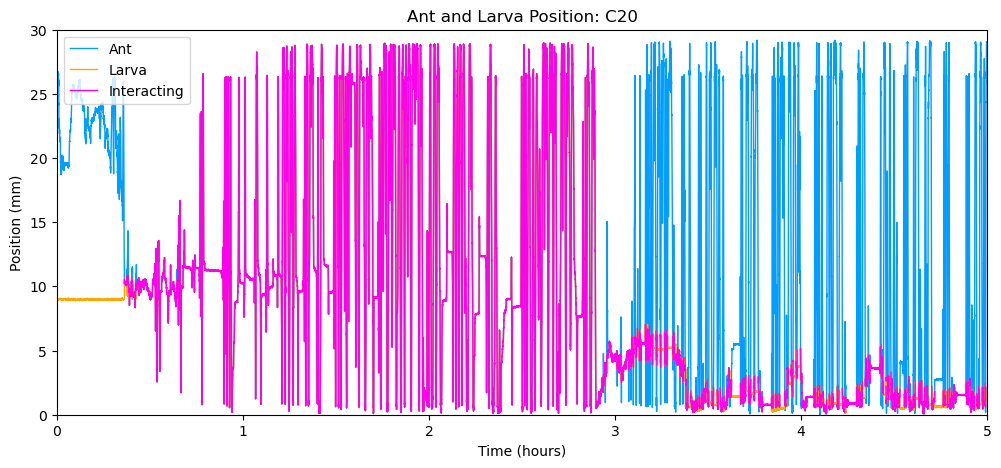

<Figure size 640x480 with 0 Axes>

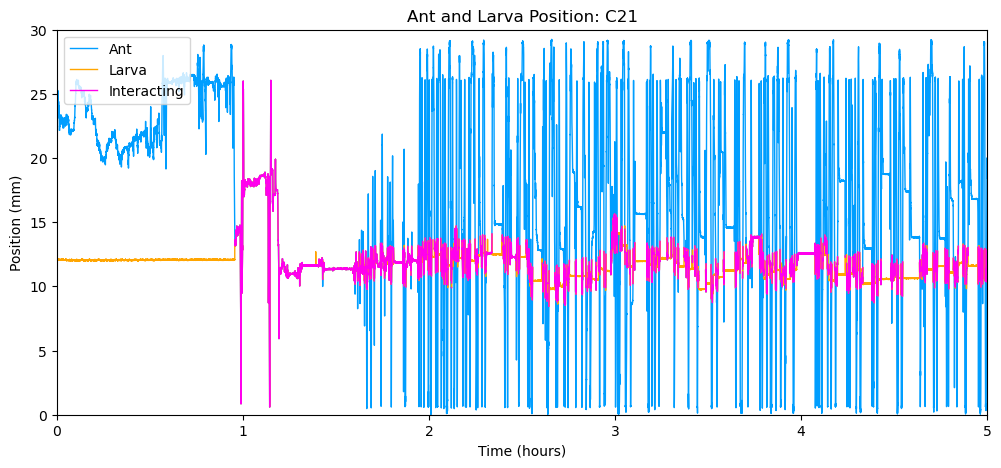

<Figure size 640x480 with 0 Axes>

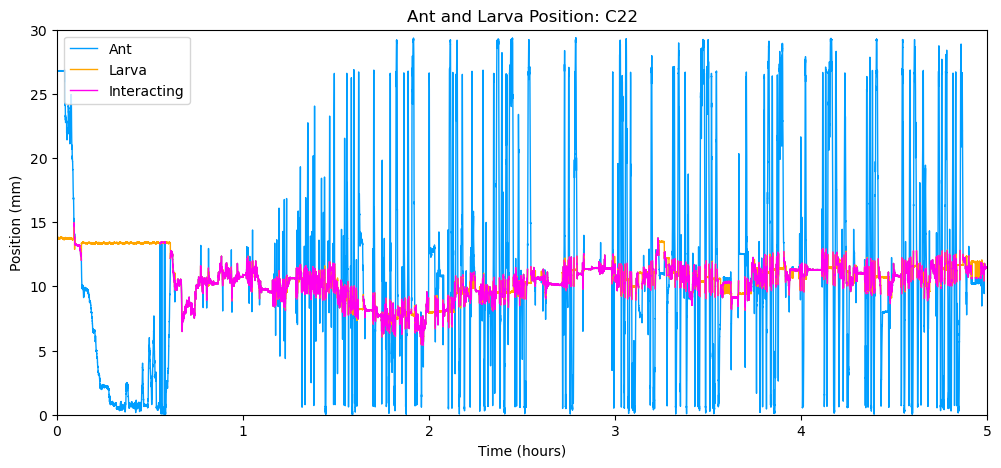

<Figure size 640x480 with 0 Axes>

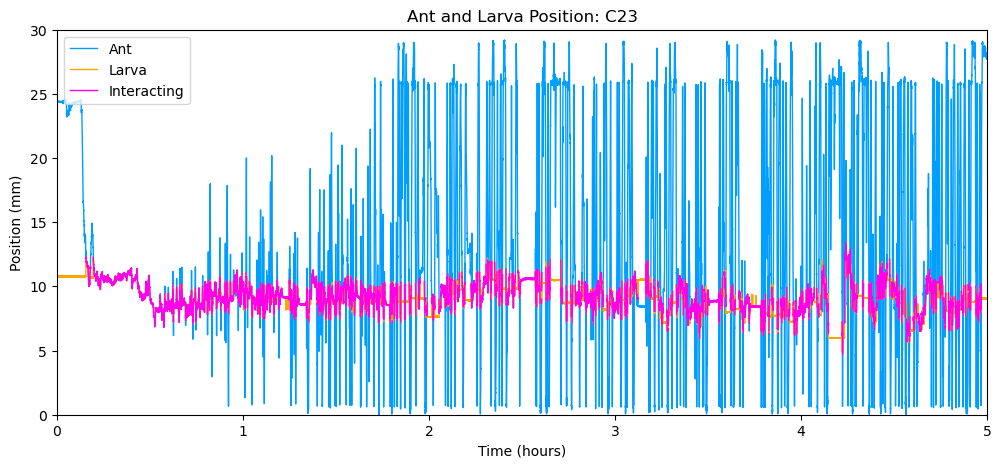

<Figure size 640x480 with 0 Axes>

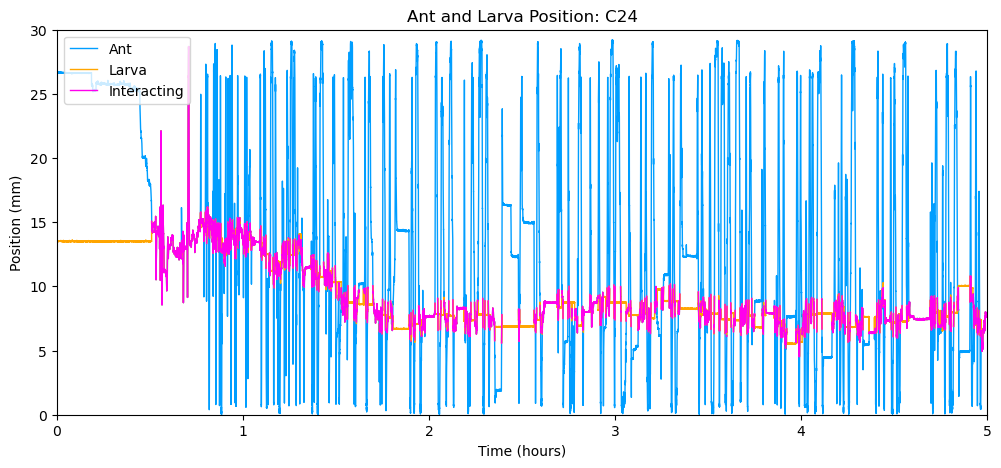

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from natsort import natsorted


# set path to the directory containing the data
path = '/Users/Alex/Desktop/Broodcare_assay_Code_&_Sample_data/antrax/analysis/'

#define the center of the assay arena. This is figured manually by looking at the first frame of the video, as in each film, the arean is in a slightly different position in the frame.
# For the Sample antrax data, the assay arean center is at 1256 x 935 pixels (x,y), and the scale is 20.5 pixels per mm.
center = [1256/20.5, 935/20.5] #center of the assay arena in mm


#use glob to import a list of strings of all the timedata_C.csv files
files = glob.glob(path + 'timedata_C*.csv')
files = natsorted(files)

#loop through the files, import eeach to dataframe and then calculate positions and plot the data
i=0
for file in files:
    df = pd.read_csv(files[i])

    #convert Ant x, Ant y, Larva x, Larva y, dal to mm, and ant_velocity to mm/frame (frame rate is 5 frames per second)
    df['Ant x'] = df['Ant x']*1000
    df['Ant y'] = df['Ant y']*1000
    df['Larva x'] = df['Larva x']*1000
    df['Larva y'] = df['Larva y']*1000
    df['dal'] = df['dal']*1000
    df['ant_velocity'] = df['ant_velocity']*1000


    #calculate the euclidean distance between the ant and the center
    df['ant_distance_c'] = np.sqrt((df['Ant x'] - center[0])**2 + (df['Ant y'] - center[1])**2)
    #find the minimum value in the ant_distance_c column
    min_value = df['ant_distance_c'].min()
    #find the index of the minimum value
    min_index = df['ant_distance_c'].idxmin()

    #define the chamber origen as the Ant x and Ant y position at the minimum value of ant_distance_c
    chamber_origin = [df['Ant x'][min_index], df['Ant y'][min_index]]

    #calculate the euclidean distance between the ant and the chamber origin and call it ant position
    df['ant_position (mm)'] = np.sqrt((df['Ant x'] - chamber_origin[0])**2 + (df['Ant y'] - chamber_origin[1])**2)
    #calculate the euclidean distance between the larva and the chamber origin and call it larva position
    df['larva_position (mm)'] = np.sqrt((df['Larva x'] - chamber_origin[0])**2 + (df['Larva y'] - chamber_origin[1])**2)

    #add a new column to df called 'Interacting Position' where if 'interacting' ==1 then 'Interacting Positiion' = df['ant_position'] else 'Interacting Position' = np.nan
    df['Interacting Position (mm)'] = np.where(df['interacting'] == 1, df['ant_position (mm)'], np.nan)

    #add column to the df for frames
    df['frame'] = np.arange(0, len(df))+1
    #add column to df for time in hours (frame rate is 5 frames per second)
    df['time (hours)'] = df['frame']/18000

    #save the 'ant position' and 'larva position' data to a csv file
    df[['frame', 'time (hours)', 'ant_position (mm)', 'larva_position (mm)']].to_csv(path + 'PositionData_C' + str(i+1) + '.csv', index=False)


    #use seaborn line plot to plot the ant and larva position data for ant7.
    plt.figure(1)
    plt.figure(figsize=(12,5))
    sns.lineplot(x='time (hours)', y='ant_position (mm)', data=df, label='Ant', color=sns.color_palette("hsv")[3], linewidth=1)
    sns.lineplot(x='time (hours)', y='larva_position (mm)', data=df, label='Larva', color='orange', linewidth=1)

    #plot the Interacting Position data using matplotlib lineplot (this does not plot the nan values)
    plt.plot(df['time (hours)'], df['Interacting Position (mm)'], label='Interacting', linewidth=1, color=sns.color_palette("hsv")[5])

    #label the y axis
    plt.ylabel('Position (mm)')
    #label the x axis
    plt.xlabel('Time (hours)')

    #set the title of the plot
    plt.title('Ant and Larva Position:' + ' ' + 'C' + str(i+1))

    #add legend to the plot
    plt.legend(loc='upper left')

    #set the x and y axis limits
    plt.ylim(0, 30)
    plt.xlim(0, 5)

    #save the plot as a pdf
    plt.savefig(path + 'PositionPlot_C' + str(i+1) + '.pdf')

    #show the plot
    plt.show()
    i+=1

    
